# Canonical Correlation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import pandas as pd
import seaborn as sns

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

In [2]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/mmreg.csv")
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science,female
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6,1
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6,1
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0,0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0,0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3,1


In [3]:
psych = df[["locus_of_control", "self_concept", "motivation"]]
acad = df[["read", "write", "math", "science"]]

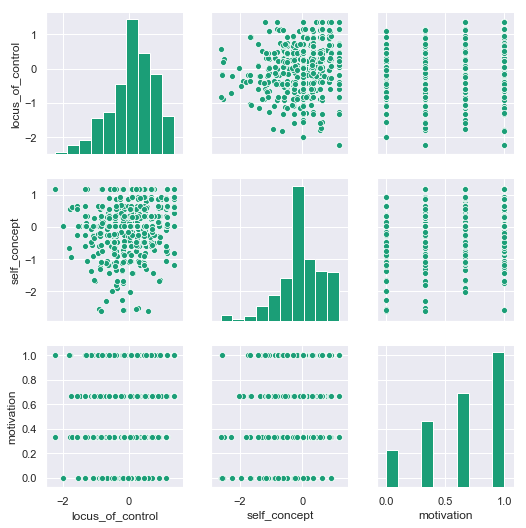

In [4]:
sns.pairplot(psych)
plt.show()

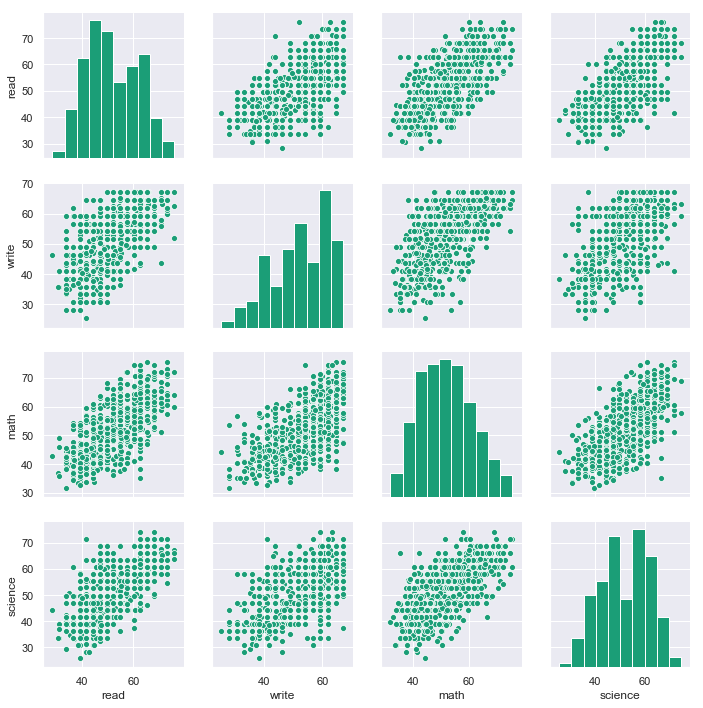

In [5]:
sns.pairplot(acad)
plt.show()

In [6]:
cca = CCA(n_components=2)
cca.fit(psych, acad)

U = pd.DataFrame(cca.x_rotations_)
U.rename(index={0:"Control",1:"Self",2:"Motivation"}, inplace=True)
print("Psych Canonical Components:")
print(U)

V = pd.DataFrame(cca.y_rotations_)
V.rename(index={0:"Read",1:"Write",2:"Math",3:"Science"}, inplace=True)
print("\nAcademic Canonical Components:")
print(V)

Psych Canonical Components:
                   0         1
Control     0.876809 -0.429422
Self       -0.174754 -0.496948
Motivation  0.447959  0.755662

Academic Canonical Components:
                0         1
Read     0.617204  0.012375
Write    0.743148  0.676109
Math     0.253335  0.021393
Science -0.051115 -0.926878


In [7]:
psych_c, acad_c = cca.fit_transform(psych, acad)

print("First Canonical Correlation =", np.corrcoef(psych_c[:,0], acad_c[:,0])[0,1])
print("Second Canonical Correlation =", np.corrcoef(psych_c[:,1], acad_c[:,1])[0,1])

First Canonical Correlation = 0.446436482428
Second Canonical Correlation = 0.153359024923


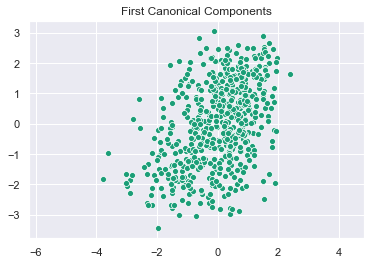

In [8]:
sns.scatterplot(psych_c[:,0], acad_c[:,0])
plt.title("First Canonical Components")
plt.axis("equal")
plt.show()

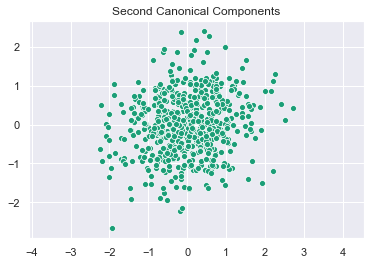

In [9]:
sns.scatterplot(psych_c[:,1], acad_c[:,1])
plt.title("Second Canonical Components")
plt.axis("equal")
plt.show()